<a href="https://colab.research.google.com/github/Shaitender/Pytorch-Lightning/blob/main/Flash_ImageClassification_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lightning-flash -U

     |████████████████████████████████| 92kB 4.2MB/s 
     |████████████████████████████████| 10.5MB 8.3MB/s 
     |████████████████████████████████| 22.2MB 1.4MB/s 
     |████████████████████████████████| 2.2MB 51.8MB/s 
     |████████████████████████████████| 1.2MB 49.3MB/s 
     |████████████████████████████████| 256kB 60.3MB/s 
     |████████████████████████████████| 276kB 58.1MB/s 
     |████████████████████████████████| 778kB 44.2MB/s 
     |████████████████████████████████| 1.8MB 55.1MB/s 
     |████████████████████████████████| 12.8MB 252kB/s 
     |████████████████████████████████| 163kB 62.0MB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 829kB 56.2MB/s 
     |████████████████████████████████| 102kB 14.2MB/s 
     |████████████████████████████████| 2.9MB 52.2MB/s 
     |████████████████████████████████| 890kB 43.0MB/s 
     |████████████████████████████████| 20.7MB 1.3MB/s 
     |████████████████████████████████| 245kB 60.3

In [ ]:
import flash
from flash import download_data
from flash.vision import ImageClassificationData, ImageClassifier
from flash.core.finetuning import FreezeUnfreeze

In [ ]:
#check version of flash
print(flash.__version__)

0.1.0


In [ ]:
#download data
download_data("https://pl-flash-data.s3.amazonaws.com/hymenoptera_data.zip",'data/')

In [ ]:
#load the data
module = ImageClassificationData.from_folders(
    backbone='resnet18',
    train_folder='/content/data/hymenoptera_data/train/',
    test_folder='/content/data/hymenoptera_data/test/',
    valid_folder='/content/data/hymenoptera_data/val/'
)

In [ ]:
#build the model
model = ImageClassifier(num_classes=module.num_classes)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [ ]:
#train 
trainer = flash.Trainer(max_epochs=5)

GPU available: False, used: False
TPU available: None, using: 0 TPU cores


In [ ]:
#finetune the model
trainer.finetune(model,datamodule=module,strategy='freeze_unfreeze')


  | Name     | Type       | Params
----------------------------------------
0 | metrics  | ModuleDict | 0     
1 | backbone | Sequential | 11.2 M
2 | head     | Sequential | 1.0 K 
----------------------------------------
1.0 K     Trainable params
11.2 M    Non-trainable params
11.2 M    Total params
44.710    Total estimated model params size (MB)


1

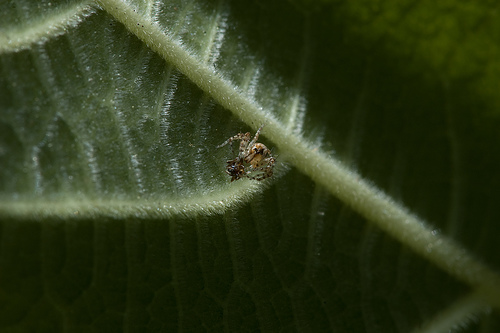

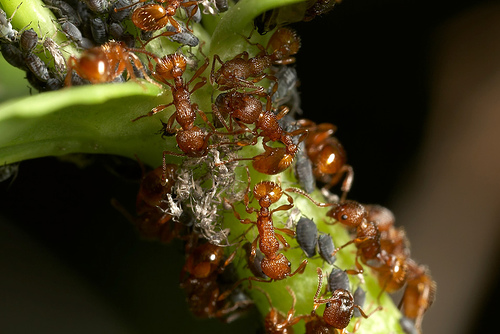

In [ ]:
from IPython.display import Image, display

sample_prediction_images = ['/content/data/hymenoptera_data/predict/1247887232_edcb61246c.jpg',
                 '/content/data/hymenoptera_data/predict/170652283_ecdaff5d1a.jpg',
                 '/content/data/hymenoptera_data/predict/220376539_20567395d8.jpg',
                 '/content/data/hymenoptera_data/predict/319494379_648fb5a1c6.jpg'
                 
]

for img in sample_prediction_images[:2]:
  display(Image(img))

In [ ]:
import glob

# get all images in folder /content/data/hymenoptera_data/predict
imgages=[]
for filepath in glob.iglob(r'/content/data/hymenoptera_data/predict/*.jpg'):
    print(filepath)
    imgages.append(filepath)

/content/data/hymenoptera_data/predict/220376539_20567395d8.jpg
/content/data/hymenoptera_data/predict/1247887232_edcb61246c.jpg
/content/data/hymenoptera_data/predict/319494379_648fb5a1c6.jpg
/content/data/hymenoptera_data/predict/170652283_ecdaff5d1a.jpg
/content/data/hymenoptera_data/predict/2039585088_c6f47c592e.jpg
/content/data/hymenoptera_data/predict/488272201_c5aa281348.jpg
/content/data/hymenoptera_data/predict/72100438_73de9f17af.jpg
/content/data/hymenoptera_data/predict/477437164_bc3e6e594a.jpg
/content/data/hymenoptera_data/predict/239161491_86ac23b0a3.jpg
/content/data/hymenoptera_data/predict/153783656_85f9c3ac70.jpg


In [ ]:
imgages

['/content/data/hymenoptera_data/predict/220376539_20567395d8.jpg',
 '/content/data/hymenoptera_data/predict/1247887232_edcb61246c.jpg',
 '/content/data/hymenoptera_data/predict/319494379_648fb5a1c6.jpg',
 '/content/data/hymenoptera_data/predict/170652283_ecdaff5d1a.jpg',
 '/content/data/hymenoptera_data/predict/2039585088_c6f47c592e.jpg',
 '/content/data/hymenoptera_data/predict/488272201_c5aa281348.jpg',
 '/content/data/hymenoptera_data/predict/72100438_73de9f17af.jpg',
 '/content/data/hymenoptera_data/predict/477437164_bc3e6e594a.jpg',
 '/content/data/hymenoptera_data/predict/239161491_86ac23b0a3.jpg',
 '/content/data/hymenoptera_data/predict/153783656_85f9c3ac70.jpg']

In [ ]:
#predictions
predictions = model.predict(imgages)
print('results -- ',predictions)

results --  [1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
